## Question 1
How do we define a successful movie? Is it how much money it makes? Is it the profitability of the movie? Should a successful movie be judged by its rating?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [2]:
gross_df = pd.read_csv('./Data/grossdf.csv')
ratings_df = pd.read_csv('./Data/ratingsdf.csv')
display(gross_df.head())
ratings_df.head()

,Unnamed: 0,title,production_budget_in_mil,dom_gross_mil
0,0,Toy Story 3,200.0,415.0
1,1,Alice in Wonderland (2010),NaN,334.2
2,2,Harry Potter and the Deathly Hallows Part 1,NaN,296.0
3,3,Inception,160.0,292.6
4,4,Shrek Forever After,165.0,238.7


,Unnamed: 0,popularity,title,genres,avg_rating,total_votes
0,0,33.533,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Fantasy,Mystery",7.70,436318.0
1,1,28.734,How to Train Your Dragon,"Action,Adventure,Animation",7.90,618909.0
2,2,28.515,Iron Man 2,"Action,Adventure,Sci-Fi",6.90,670058.0
3,3,28.005,Toy Story,NaN,7.90,10174.0
4,5,27.920,Inception,"Action,Adventure,Sci-Fi",8.55,1863252.0


I realized here that I forgot to specify an index when exporting my cleaned DataFrames to csv, so I'll just have to remove the unnamed column from them if they get in the way. Below, I do the little bit of remaining cleaning that is question specific.

In [3]:
print(f'''Of the {gross_df.shape[0]} values in the Production Budget column, {gross_df['production_budget_in_mil'].isna().sum()} are NaN values.''')

Of the 7930 values in the Production Budget column, 2149 are NaN values.


What is the best way to deal with these missing values? I could fill them with values based on the frequency of recurring values, or I could remove the entire columns, or I could assign them a placeholder value. Another option is to calculate the profit of the movies that have production budgets, and from there find a relationship between the profit of a movei, and its popularity. Then I could use the popularity of each movie to assign a weighted budget value from a frequency of recurring budgets, if, of course, there proves to be a correlation between popularity and profit. Before any of that, though, I need to see if there are any missing values in the popularity column.

In [4]:
print(f'There are {ratings_df["popularity"].isna().sum()} NaN values in the popularity column, out of {ratings_df.shape[0]}.')

There are 58385 NaN values in the popularity column, out of 87008.


Looks like popularity isnt going to be a useful statistic, based just on how many values are missing. Seeing this, I'm going to attempt to combine the two DataFrames, in th ehopes that I can find a correlation for profit.

In [5]:
gross_df['title'].isin(ratings_df['title']).value_counts()

False    4107
True     3823
Name: title, dtype: int64

In [6]:
dfs = [gross_df, ratings_df]

for df in dfs:
    df['title'] = df['title'].apply(lambda x: x.replace(":", ""))
    df['title'] = df['title'].apply(lambda x: x.replace(",", ""))
    df['title'] = df['title'].apply(lambda x: x.replace(".", ""))
    df['title'] = df['title'].apply(lambda x: x.replace("'", ""))
    df['title'] = df['title'].apply(lambda x: x.replace("!", ""))
    df['title'] = df['title'].apply(lambda x: x.replace("-", ""))
    df['title'] = df['title'].apply(lambda x: x.replace(":", ""))
    df['title'] = df['title'].apply(lambda x: x.title())
    df['title'] = df['title'].apply(lambda x: x.strip())

gross_df['title'].isin(ratings_df['title']).value_counts()

True     4020
False    3910
Name: title, dtype: int64

In [7]:
inside_df = pd.merge(gross_df, ratings_df, how="inner", on='title')
display(inside_df.info())
inside_df['title'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5680 entries, 0 to 5679
Data columns (total 9 columns):
Unnamed: 0_x                5680 non-null int64
title                       5680 non-null object
production_budget_in_mil    3749 non-null float64
dom_gross_mil               5650 non-null float64
Unnamed: 0_y                5680 non-null int64
popularity                  4317 non-null float64
genres                      5412 non-null object
avg_rating                  5680 non-null float64
total_votes                 5680 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 443.8+ KB


None

Home                                   150
The Gift                                64
Eden                                    30
Truth Or Dare                           25
Split                                   24
                                      ... 
The Missing Picture                      1
Smurfs The Lost Village                  1
The Hunger Games Mockingjay  Part 2      1
Neil Young Journeys                      1
Velvet Buzzsaw                           1
Name: title, Length: 3905, dtype: int64

In [8]:
inside_df.duplicated().value_counts()

False    5680
dtype: int64

In [9]:
inside_df.loc[inside_df['title'] == 'Home']

,Unnamed: 0_x,title,production_budget_in_mil,dom_gross_mil,Unnamed: 0_y,popularity,genres,avg_rating,total_votes
3711,3522,Home,130.0,177.4,11754,0.84,Drama,7.10,813.0
3712,3522,Home,130.0,177.4,11755,0.84,Drama,6.50,98.0
3713,3522,Home,130.0,177.4,11756,0.84,Drama,7.00,142.0
3714,3522,Home,130.0,177.4,11757,0.84,"Adventure,Animation,Comedy",6.80,85833.0
3715,3522,Home,130.0,177.4,11758,0.84,"Drama,Romance,Thriller",7.70,34.0
...,...,...,...,...,...,...,...,...,...
3856,3524,Home,0.5,0.0,11799,0.60,"Drama,Horror,Thriller",3.95,304.0
3857,3524,Home,0.5,0.0,11800,0.60,"Drama,Romance",5.40,307.0
3858,3524,Home,0.5,0.0,11801,0.60,Drama,5.75,1050.0
3859,3524,Home,0.5,0.0,19749,0.60,NaN,8.50,1.0


In [10]:
inside_df['Unnamed: 0_x'].value_counts()

3523    50
3524    50
3522    50
6110    32
6111    32
        ..
5156     1
1058     1
3103     1
3099     1
0        1
Name: Unnamed: 0_x, Length: 4020, dtype: int64

In [11]:
display(inside_df.loc[inside_df['Unnamed: 0_x'] == 3522].head(1))
display(inside_df.loc[inside_df['Unnamed: 0_x'] == 3523].head(1))
inside_df.loc[inside_df['Unnamed: 0_x'] == 3524].head(1)

,Unnamed: 0_x,title,production_budget_in_mil,dom_gross_mil,Unnamed: 0_y,popularity,genres,avg_rating,total_votes
3711,3522,Home,130.0,177.4,11754,0.84,Drama,7.1,813.0


,Unnamed: 0_x,title,production_budget_in_mil,dom_gross_mil,Unnamed: 0_y,popularity,genres,avg_rating,total_votes
3761,3523,Home,12.0,0.0,11754,0.84,Drama,7.1,813.0


,Unnamed: 0_x,title,production_budget_in_mil,dom_gross_mil,Unnamed: 0_y,popularity,genres,avg_rating,total_votes
3811,3524,Home,0.5,0.0,11754,0.84,Drama,7.1,813.0


In [12]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [13]:
inside_df.sort_values(by = 'total_votes', ascending = False, inplace = True)
inside_df.head()

,Unnamed: 0_x,title,production_budget_in_mil,dom_gross_mil,Unnamed: 0_y,popularity,genres,avg_rating,total_votes
2,3,Inception,160.0,292.6,5,27.920,"Action,Adventure,Sci-Fi",8.55,1863252.0
742,733,The Dark Knight Rises,275.0,448.1,6396,26.220,"Action,Thriller",8.05,1401702.0
1529,1492,Interstellar,165.0,188.0,13369,28.440,"Adventure,Drama,Sci-Fi",8.40,1317931.0
752,747,Django Unchained,100.0,162.8,6403,21.260,"Drama,Western",8.20,1227130.0
3664,3405,The Avengers,225.0,623.3,6390,50.289,"Action,Adventure,Sci-Fi",7.85,1203328.0


In [14]:
inside_df['bool'] = inside_df['title'].duplicated()
inside_df.head()

,Unnamed: 0_x,title,production_budget_in_mil,dom_gross_mil,Unnamed: 0_y,popularity,genres,avg_rating,total_votes,bool
2,3,Inception,160.0,292.6,5,27.920,"Action,Adventure,Sci-Fi",8.55,1863252.0,False
742,733,The Dark Knight Rises,275.0,448.1,6396,26.220,"Action,Thriller",8.05,1401702.0,False
1529,1492,Interstellar,165.0,188.0,13369,28.440,"Adventure,Drama,Sci-Fi",8.40,1317931.0,False
752,747,Django Unchained,100.0,162.8,6403,21.260,"Drama,Western",8.20,1227130.0,False
3664,3405,The Avengers,225.0,623.3,6390,50.289,"Action,Adventure,Sci-Fi",7.85,1203328.0,False


In [15]:
q = """SELECT title, avg_rating, total_votes,
       production_budget_in_mil as prod_budget_mil,
       dom_gross_mil
       FROM inside_df
       WHERE bool = 0
       """

test_df = pysqldf(q)
test_df.head()

,title,avg_rating,total_votes,prod_budget_mil,dom_gross_mil
0,Inception,8.55,1863252.0,160.0,292.6
1,The Dark Knight Rises,8.05,1401702.0,275.0,448.1
2,Interstellar,8.40,1317931.0,165.0,188.0
3,Django Unchained,8.20,1227130.0,100.0,162.8
4,The Avengers,7.85,1203328.0,225.0,623.3


In [16]:
for x in test_df.columns:
    print(test_df[x].isna().value_counts())

False    3905
Name: title, dtype: int64
False    3905
Name: avg_rating, dtype: int64
False    3905
Name: total_votes, dtype: int64
False    2343
True     1562
Name: prod_budget_mil, dtype: int64
False    3888
True       17
Name: dom_gross_mil, dtype: int64


In [17]:
# Confirming that the 16 NaN values under dom_gross_mil are also missing prod_budget_mil values,
# making them safe to drop

test_df['dom_gross_mil'].fillna(12345, inplace = True)

q1 = """SELECT title, total_votes, prod_budget_mil, dom_gross_mil
        FROM test_df
        WHERE dom_gross_mil = 12345"""

pysqldf(q1)

,title,total_votes,prod_budget_mil,dom_gross_mil
0,Solace,50675.0,None,12345.0
1,The Tall Man,36900.0,None,12345.0
2,6 Souls,30389.0,None,12345.0
3,22 Bullets,30360.0,None,12345.0
4,Jessabelle,20970.0,None,12345.0
5,Secret Superstar,16563.0,None,12345.0
6,Dark Tide,7787.0,None,12345.0
7,Viral,7388.0,None,12345.0
8,14 Blades,7100.0,None,12345.0
9,Force,6365.0,None,12345.0


In [18]:
q2 = """SELECT *
        FROM test_df
        WHERE dom_gross_mil != 12345"""

final_rating_df = pysqldf(q2)
print(final_rating_df.shape)
final_rating_df.head(2)

(3888, 5)


,title,avg_rating,total_votes,prod_budget_mil,dom_gross_mil
0,Inception,8.55,1863252.0,160.0,292.6
1,The Dark Knight Rises,8.05,1401702.0,275.0,448.1


In [19]:
# Test and adjust amount of decimal places in each value of dom_gross_mil. 

y = final_rating_df['dom_gross_mil'].tolist()

test1 = []
for i in y:
    test1.append(len(str(i)))

output1 = []
for x in test1:
    if x not in output1:
        output1.append(x)
print(output1)

[5, 4, 18, 3, 6, 9, 19, 10, 20, 8]


In [20]:
final_rating_df['dom_gross_mil'] = final_rating_df['dom_gross_mil'].apply(lambda x: round(x, 0))

y = final_rating_df['dom_gross_mil'].tolist()

test1 = []
for i in y:
    test1.append(len(str(i)))

output1 = []
for x in test1:
    if x not in output1:
        output1.append(x)
print(output1)

[5, 4, 3]


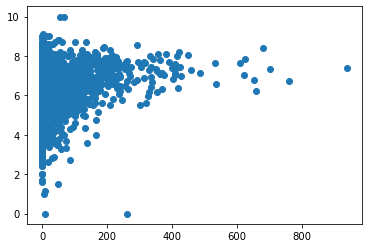

In [29]:
y = final_rating_df['avg_rating'].tolist()
x = final_rating_df['dom_gross_mil'].tolist()

plt.figsize = (18,8)
plt.plot(x, y)

plt.show;